### Необходимо скачать датасет [Ириски Фишера](http://archive.ics.uci.edu/ml/datasets/Iris), который имеет следующие поля:

1. `sepal length in cm`
2. `sepal width in cm`
3. `petal length in cm`
4. `petal width in cm`
5. `class_name`

In [3]:
import pymysql
import csv

In [4]:
FILE_CSV = 'iris.data'

In [1]:
import pandas as pd

In [8]:
pd.read_csv(FILE_CSV, names=[
    'sepal length in cm', 'sepal width in cm',
    'petal length in cm', 'petal width in cm',
    'class_name']).shape

(150, 5)

### Создаем подключение к БД `nordicDB`

In [11]:
db_conn = pymysql.connect(host="139.162.170.240",user="nordic",
                          passwd="password0",db="nordicDB")
cursor = db_conn.cursor()

### Создаем таблицу с первичным автоинкрементируемым ключом

In [14]:
query = """
    CREATE TABLE IF NOT EXISTS main_table (
        ID INT PRIMARY KEY AUTO_INCREMENT
        ,`sepal_length_in_cm` FLOAT NOT NULL
        ,`sepal_width_in_cm` FLOAT NOT NULL
        ,`petal_length_in_cm` FLOAT NOT NULL
        ,`petal_width_in_cm` FLOAT
        ,`class_name` TEXT NOT NULL
    )
"""

cursor.execute(query)
db_conn.commit()

C:\ProgramData\Anaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (1050, "Table 'main_table' already exists")
  result = self._query(query)


### Ограничения SQL

### Переносим данные из csv в db

In [19]:
query = """
    INSERT INTO main_table (
        `sepal_length_in_cm`
        ,`sepal_width_in_cm`
        ,`petal_length_in_cm`
        ,`petal_width_in_cm`
        ,`class_name`
    )
    VALUES (%s, %s, %s, %s, %s)
"""

In [20]:
with open(FILE_CSV) as f:
    f_read = csv.reader(f)
    for row in f_read:
        print(row)
        if len(row) > 0:
            cursor.execute(query, row)

db_conn.commit()

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']
['5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['5.0', '3.4', '1.5', '0.2', 'Iris-setosa']
['4.4', '2.9', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.1', '1.5', '0.1', 'Iris-setosa']
['5.4', '3.7', '1.5', '0.2', 'Iris-setosa']
['4.8', '3.4', '1.6', '0.2', 'Iris-setosa']
['4.8', '3.0', '1.4', '0.1', 'Iris-setosa']
['4.3', '3.0', '1.1', '0.1', 'Iris-setosa']
['5.8', '4.0', '1.2', '0.2', 'Iris-setosa']
['5.7', '4.4', '1.5', '0.4', 'Iris-setosa']
['5.4', '3.9', '1.3', '0.4', 'Iris-setosa']
['5.1', '3.5', '1.4', '0.3', 'Iris-setosa']
['5.7', '3.8', '1.7', '0.3', 'Iris-setosa']
['5.1', '3.8', '1.5', '0.3', 'Iris-setosa']
['5.4', '3.4', '1.7', '0.2', 'Iris-setosa']
['5.1', '3.7', '1.5', '0.4', 'Iris-setosa']
['4.6', '3.6', '1.0', '0.2', 'Ir

### Смотрим как всё записали

In [15]:
query_select_all = """
    SELECT * 
    FROM `main_table`
"""

cursor.execute(query_select_all)
cursor.fetchall()

((1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
 (2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'),
 (3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
 (4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
 (5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'),
 (6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
 (7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
 (8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'),
 (9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
 (10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
 (11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
 (12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
 (13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'),
 (14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'),
 (15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'),
 (16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
 (17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
 (18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
 (19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
 (20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'),
 (21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'),
 (22, 5.1, 3.7, 1.5, 0.4, 'Iris-setosa'),
 (23, 4.6, 3.6, 1.0, 0.2, 'Iris-setosa'),
 (24, 5.1, 3.3, 1.7, 0.5, 'Iris-setosa'),
 

### `COUNT()` - функция SQL, которая возвращает количество записей

In [24]:
query = """
    SELECT COUNT(ID)
    FROM main_table
"""

cursor.execute(query)
cursor.fetchall()[0][0]

150

In [22]:
type((150))

int

In [23]:
type((150,))

tuple

### `AVG()` - функция SQL, которая возвращает среднее значение записей

In [24]:
query = """
    SELECT AVG(`sepal_length_in_cm`)
    FROM main_table
"""

cursor.execute(query)
print(cursor.fetchall())
cursor.execute(query)
print(cursor.fetchall()[0][0])

((5.843333326975505,),)
5.843333326975505


### `SUM()` - функция SQL, которая возвращает сумму значение записей

In [4]:
query = """
    SELECT SUM(sepal_length_in_cm)
    FROM main_table
"""

cursor.execute(query)
cursor.fetchall()

((876.4999990463257,),)

### `MIN()` - функция SQL, которая возвращает минимальное значение записей

In [5]:
query = """
    SELECT MIN(ID)
    FROM main_table
"""

cursor.execute(query)
cursor.fetchall()

((1,),)

### `MAX()` - функция SQL, которая возвращает максимальное значение записей

In [25]:
query = """
    SELECT MAX(ID)
    FROM main_table
"""

cursor.execute(query)
cursor.fetchall()

((150,),)

# SELECT

### `DISTINCT` - оператор, который выбирает уникальные записи

In [27]:
query = """
    SELECT DISTINCT
        class_name
    FROM main_table
"""

cursor.execute(query)
list(map(lambda x: x[0], cursor.fetchall()))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
lambda x: x[0]

def f(x):
    return x[0]

In [28]:
cursor.execute(query)
[row[0] for row in cursor.fetchall()]

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

### Уникальные значения нескольких столбцов

In [32]:
query = """
    SELECT DISTINCT sepal_length_in_cm, class_name
    FROM main_table
"""

cursor.execute(query)
cursor.fetchall()

((5.1, 'Iris-setosa'),
 (4.9, 'Iris-setosa'),
 (4.7, 'Iris-setosa'),
 (4.6, 'Iris-setosa'),
 (5.0, 'Iris-setosa'),
 (5.4, 'Iris-setosa'),
 (4.4, 'Iris-setosa'),
 (4.8, 'Iris-setosa'),
 (4.3, 'Iris-setosa'),
 (5.8, 'Iris-setosa'),
 (5.7, 'Iris-setosa'),
 (5.2, 'Iris-setosa'),
 (5.5, 'Iris-setosa'),
 (4.5, 'Iris-setosa'),
 (5.3, 'Iris-setosa'),
 (7.0, 'Iris-versicolor'),
 (6.4, 'Iris-versicolor'),
 (6.9, 'Iris-versicolor'),
 (5.5, 'Iris-versicolor'),
 (6.5, 'Iris-versicolor'),
 (5.7, 'Iris-versicolor'),
 (6.3, 'Iris-versicolor'),
 (4.9, 'Iris-versicolor'),
 (6.6, 'Iris-versicolor'),
 (5.2, 'Iris-versicolor'),
 (5.0, 'Iris-versicolor'),
 (5.9, 'Iris-versicolor'),
 (6.0, 'Iris-versicolor'),
 (6.1, 'Iris-versicolor'),
 (5.6, 'Iris-versicolor'),
 (6.7, 'Iris-versicolor'),
 (5.8, 'Iris-versicolor'),
 (6.2, 'Iris-versicolor'),
 (6.8, 'Iris-versicolor'),
 (5.4, 'Iris-versicolor'),
 (5.1, 'Iris-versicolor'),
 (6.3, 'Iris-virginica'),
 (5.8, 'Iris-virginica'),
 (7.1, 'Iris-virginica'),
 (6.5, 'Ir

### Смотрим количество уникальных записей

In [33]:
query = """
    SELECT
        COUNT(DISTINCT class_name)
    FROM main_table
"""

cursor.execute(query)
cursor.fetchall()

((3,),)

### Смотрим количество уникальных записей по нескольким столбцам

In [35]:
query = """
    SELECT COUNT(*)
    FROM (
        SELECT DISTINCT sepal_length_in_cm, class_name
        FROM main_table
    ) as t
"""

cursor.execute(query)
cursor.fetchall()

((57,),)

### `WHERE` - условный оператор

In [ ]:
df[df.value == 5]

In [36]:
query = """
    SELECT *
    FROM main_table
    WHERE class_name = 'Iris-versicolor'
"""

cursor.execute(query)
cursor.fetchall()

((51, 7.0, 3.2, 4.7, 1.4, 'Iris-versicolor'),
 (52, 6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'),
 (53, 6.9, 3.1, 4.9, 1.5, 'Iris-versicolor'),
 (54, 5.5, 2.3, 4.0, 1.3, 'Iris-versicolor'),
 (55, 6.5, 2.8, 4.6, 1.5, 'Iris-versicolor'),
 (56, 5.7, 2.8, 4.5, 1.3, 'Iris-versicolor'),
 (57, 6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'),
 (58, 4.9, 2.4, 3.3, 1.0, 'Iris-versicolor'),
 (59, 6.6, 2.9, 4.6, 1.3, 'Iris-versicolor'),
 (60, 5.2, 2.7, 3.9, 1.4, 'Iris-versicolor'),
 (61, 5.0, 2.0, 3.5, 1.0, 'Iris-versicolor'),
 (62, 5.9, 3.0, 4.2, 1.5, 'Iris-versicolor'),
 (63, 6.0, 2.2, 4.0, 1.0, 'Iris-versicolor'),
 (64, 6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'),
 (65, 5.6, 2.9, 3.6, 1.3, 'Iris-versicolor'),
 (66, 6.7, 3.1, 4.4, 1.4, 'Iris-versicolor'),
 (67, 5.6, 3.0, 4.5, 1.5, 'Iris-versicolor'),
 (68, 5.8, 2.7, 4.1, 1.0, 'Iris-versicolor'),
 (69, 6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'),
 (70, 5.6, 2.5, 3.9, 1.1, 'Iris-versicolor'),
 (71, 5.9, 3.2, 4.8, 1.8, 'Iris-versicolor'),
 (72, 6.1, 2.8, 4.0, 1.3, 'Iris-ve

### WHERE работает с операторами:
    =
    >=
    <=
    >
    <
    NOT
    AND
    OR
    IS NULL
    IS NOT NULL
    !=
    <>
    IN
    BETWEEN
    LIKE
    GLOB

### `AND` - оператор "логическое И"

In [38]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name = 'Iris-versicolor'
        AND
        sepal_length_in_cm >= 6
        
"""

cursor.execute(query)
len(cursor.fetchall())

24

### Оператор можно использовать несколько раз

In [39]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name = 'Iris-versicolor'
        AND
        sepal_length_in_cm >= 6
        AND
        sepal_length_in_cm < 6.5      
"""

cursor.execute(query)
cursor.fetchall()

((52, 6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'),
 (57, 6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'),
 (63, 6.0, 2.2, 4.0, 1.0, 'Iris-versicolor'),
 (64, 6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'),
 (69, 6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'),
 (72, 6.1, 2.8, 4.0, 1.3, 'Iris-versicolor'),
 (73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (74, 6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'),
 (75, 6.4, 2.9, 4.3, 1.3, 'Iris-versicolor'),
 (79, 6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'),
 (84, 6.0, 2.7, 5.1, 1.6, 'Iris-versicolor'),
 (86, 6.0, 3.4, 4.5, 1.6, 'Iris-versicolor'),
 (88, 6.3, 2.3, 4.4, 1.3, 'Iris-versicolor'),
 (92, 6.1, 3.0, 4.6, 1.4, 'Iris-versicolor'),
 (98, 6.2, 2.9, 4.3, 1.3, 'Iris-versicolor'))

### `BETWEEN` - оператор диапазона значений

In [40]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name = 'Iris-versicolor'
        AND
        sepal_length_in_cm BETWEEN 6 AND 6.4
--        sepal_length_in_cm >= 6
--        AND
--        sepal_length_in_cm < 6.5 
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
"""

cursor.execute(query)
cursor.fetchall()

((57, 6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'),
 (64, 6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'),
 (72, 6.1, 2.8, 4.0, 1.3, 'Iris-versicolor'),
 (73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (74, 6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'),
 (79, 6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'),
 (84, 6.0, 2.7, 5.1, 1.6, 'Iris-versicolor'),
 (92, 6.1, 3.0, 4.6, 1.4, 'Iris-versicolor'),
 (98, 6.2, 2.9, 4.3, 1.3, 'Iris-versicolor'))

### `OR` - оператор "логическое ИЛИ"

In [41]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name = 'Iris-versicolor'
        AND
        sepal_length_in_cm BETWEEN 6 AND 6.4
--        sepal_length_in_cm >= 6
--        AND
--        sepal_length_in_cm < 6.5 
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
        AND
        (
            petal_width_in_cm = 1.3
            OR
            petal_width_in_cm = 1.5
            OR
            petal_width_in_cm = 1.6
        )     
"""

cursor.execute(query)
cursor.fetchall()

((73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (79, 6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'))

### `IN` - оператор вхождения в диапазон

In [42]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name = 'Iris-versicolor'
        AND
        sepal_length_in_cm BETWEEN 6 AND 6.4
--        sepal_length_in_cm >= 6
--        AND
--        sepal_length_in_cm < 6.5 
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
        AND
        petal_width_in_cm IN (1.3, 1.5, 1.6)    
"""

cursor.execute(query)
cursor.fetchall()

((73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (79, 6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'))

### `NOT` - оператор "логическое не"

In [43]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name = 'Iris-versicolor'
        AND
        sepal_length_in_cm BETWEEN 6 AND 6.4
--        sepal_length_in_cm >= 6
--        AND
--        sepal_length_in_cm < 6.5 
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
        AND
        petal_width_in_cm IN (1.3, 1.5, 1.6)
        AND
        ID NOT IN (72, 79, 98) 
"""

cursor.execute(query)
cursor.fetchall()

((73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),)

### `LIKE` - оператор подобности. Использует 2 знака: `%` - любое количесво знаков, `_` - один знак

In [44]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name LIKE '%ris-v%'
        AND
        sepal_length_in_cm BETWEEN 6 AND 6.4
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
        AND
        petal_width_in_cm IN (1.3, 1.5, 1.6)    
"""

cursor.execute(query)
cursor.fetchall()

((73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (79, 6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'),
 (134, 6.3, 2.8, 5.1, 1.5, 'Iris-virginica'))

In [46]:
df = pd.read_sql("""
    SELECT *
    FROM main_table
    WHERE 
        class_name LIKE '%ris-v%'
        AND
        sepal_length_in_cm BETWEEN 6 AND 6.4
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
        AND
        petal_width_in_cm IN (1.3, 1.5, 1.6)   
""", db_conn)

In [47]:
df

,ID,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class_name
0,73,6.3,2.5,4.9,1.5,Iris-versicolor
1,79,6.0,2.9,4.5,1.5,Iris-versicolor
2,134,6.3,2.8,5.1,1.5,Iris-virginica


In [45]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name LIKE '%ris-ve%'
        AND
        sepal_length_in_cm BETWEEN 6 AND 6.4
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
        AND
        petal_width_in_cm IN (1.3, 1.5, 1.6)    
"""

cursor.execute(query)
cursor.fetchall()

((73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (79, 6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'))

### `ORDER BY` - оператор сортировки. Можно сортировать по возрастанию `ASC` и по убыванию `DESC`. По умолчанию сортирует по возрастанию

In [48]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name LIKE '%ris-v%'
        AND
        sepal_length_in_cm BETWEEN 6 AND 6.4
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
        AND
        petal_width_in_cm IN (1.3, 1.5, 1.6)    
    ORDER BY sepal_length_in_cm DESC
"""

cursor.execute(query)
cursor.fetchall()

((73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (134, 6.3, 2.8, 5.1, 1.5, 'Iris-virginica'),
 (79, 6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'))

### Сортировка по двум столбцам

In [49]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        class_name LIKE '%ris-v%'
        AND
        sepal_length_in_cm BETWEEN 6 AND 6.4
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
        AND
        petal_width_in_cm IN (1.3, 1.5, 1.6)    
    ORDER BY 
        sepal_length_in_cm DESC
        ,sepal_width_in_cm ASC
"""

cursor.execute(query)
cursor.fetchall()

((73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (134, 6.3, 2.8, 5.1, 1.5, 'Iris-virginica'),
 (79, 6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'))

### `LIMIT` - оператор ограничения количества выводимых строк

In [52]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        sepal_length_in_cm BETWEEN 6 AND 6.4
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
    ORDER BY 
        sepal_length_in_cm DESC
        ,sepal_width_in_cm ASC
    LIMIT 4
"""

cursor.execute(query)
cursor.fetchall()

((73, 6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'),
 (147, 6.3, 2.5, 5.0, 1.9, 'Iris-virginica'),
 (124, 6.3, 2.7, 4.9, 1.8, 'Iris-virginica'),
 (134, 6.3, 2.8, 5.1, 1.5, 'Iris-virginica'))

### `OFFSET` - оператор смещения выводимых строк

In [53]:
query = """
    SELECT *
    FROM main_table
    WHERE 
        sepal_length_in_cm BETWEEN 6 AND 6.4
        AND
        sepal_width_in_cm BETWEEN 2.5 AND 3.3
    ORDER BY 
        sepal_length_in_cm DESC
        ,sepal_width_in_cm ASC
    LIMIT 4 OFFSET 2
"""

cursor.execute(query)
cursor.fetchall()

((124, 6.3, 2.7, 4.9, 1.8, 'Iris-virginica'),
 (134, 6.3, 2.8, 5.1, 1.5, 'Iris-virginica'),
 (104, 6.3, 2.9, 5.6, 1.8, 'Iris-virginica'),
 (57, 6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'))

### `GROUP BY` - оператор группировки

In [55]:
query = """
    SELECT 
        class_name
        ,SUM(sepal_length_in_cm)
    FROM main_table
    GROUP BY class_name
"""

cursor.execute(query)
cursor.fetchall()

(('Iris-setosa', 50), ('Iris-versicolor', 50), ('Iris-virginica', 50))

### `as` - Оператор алиаса (переименования столбца)

In [59]:
query = """
    SELECT 
        class_name
        ,SUM(sepal_length_in_cm) as sum_sepal_length
    FROM main_table
    GROUP BY class_name
"""

cursor.execute(query)
cursor.fetchall()

(('Iris-setosa', 250.30000019073486),
 ('Iris-versicolor', 296.7999987602234),
 ('Iris-virginica', 329.40000009536743))

In [61]:
df = pd.read_sql(query, db_conn)

df

,class_name,sum_sepal_length
0,Iris-setosa,250.300000
1,Iris-versicolor,296.799999
2,Iris-virginica,329.400000


In [62]:
query = """
    SELECT 
        class_name
        ,SUM(sepal_length_in_cm)
        ,SUM(sepal_width_in_cm)
        ,SUM(petal_length_in_cm)
        ,SUM(petal_width_in_cm)
        ,MIN(sepal_length_in_cm)
        ,MIN(sepal_width_in_cm)
        ,MIN(petal_length_in_cm)
        ,MIN(petal_width_in_cm)
        ,MAX(sepal_length_in_cm)
        ,MAX(sepal_width_in_cm)
        ,MAX(petal_length_in_cm)
        ,MAX(petal_width_in_cm)
        ,AVG(sepal_length_in_cm)
        ,AVG(sepal_width_in_cm)
        ,AVG(petal_length_in_cm)
        ,AVG(petal_width_in_cm)
        ,COUNT(sepal_length_in_cm)
        ,COUNT(sepal_width_in_cm)
        ,COUNT(petal_length_in_cm)
        ,COUNT(petal_width_in_cm)
    FROM main_table
    GROUP BY class_name
"""

cursor.execute(query)
cursor.fetchall()

(('Iris-setosa',
  250.30000019073486,
  170.900000333786,
  73.19999980926514,
  12.200000241398811,
  4.3,
  2.3,
  1.0,
  0.1,
  5.8,
  4.4,
  1.9,
  0.6,
  5.006000003814697,
  3.41800000667572,
  1.4639999961853027,
  0.24400000482797624,
  50,
  50,
  50,
  50),
 ('Iris-versicolor',
  296.7999987602234,
  138.50000047683716,
  212.99999904632568,
  66.29999959468842,
  4.9,
  2.0,
  3.0,
  1.0,
  7.0,
  3.4,
  5.1,
  1.8,
  5.935999975204468,
  2.770000009536743,
  4.259999980926514,
  1.3259999918937684,
  50,
  50,
  50,
  50),
 ('Iris-virginica',
  329.40000009536743,
  148.69999957084656,
  277.5999994277954,
  101.29999887943268,
  4.9,
  2.2,
  4.5,
  1.4,
  7.9,
  3.8,
  6.9,
  2.5,
  6.588000001907349,
  2.9739999914169313,
  5.551999988555909,
  2.0259999775886537,
  50,
  50,
  50,
  50))

In [64]:
df = pd.read_sql(query, db_conn)

df.T

,0,1,2
class_name,Iris-setosa,Iris-versicolor,Iris-virginica
SUM(sepal_length_in_cm),250.3,296.8,329.4
SUM(sepal_width_in_cm),170.9,138.5,148.7
SUM(petal_length_in_cm),73.2,213,277.6
SUM(petal_width_in_cm),12.2,66.3,101.3
MIN(sepal_length_in_cm),4.3,4.9,4.9
MIN(sepal_width_in_cm),2.3,2,2.2
MIN(petal_length_in_cm),1,3,4.5
MIN(petal_width_in_cm),0.1,1,1.4
MAX(sepal_length_in_cm),5.8,7,7.9


### `HAVING` - условный оператор при группировке

In [69]:
query = """
    SELECT 
        class_name
        ,petal_width_in_cm
        ,COUNT(sepal_length_in_cm) as cnt
        ,SUM(sepal_length_in_cm)
    FROM main_table
    GROUP BY class_name, petal_width_in_cm
    ORDER BY cnt DESC
"""

cursor.execute(query)
cursor.fetchall()

(('Iris-setosa', 0.2, 28, 139.30000019073486),
 ('Iris-versicolor', 1.3, 13, 76.49999904632568),
 ('Iris-virginica', 1.8, 11, 70.90000009536743),
 ('Iris-versicolor', 1.5, 10, 61.90000009536743),
 ('Iris-virginica', 2.3, 8, 55.299999713897705),
 ('Iris-versicolor', 1.4, 7, 44.49999952316284),
 ('Iris-setosa', 0.4, 7, 37.09999990463257),
 ('Iris-setosa', 0.3, 7, 34.799999713897705),
 ('Iris-versicolor', 1.0, 7, 37.90000009536743),
 ('Iris-virginica', 2.0, 6, 39.89999961853027),
 ('Iris-virginica', 2.1, 6, 41.5),
 ('Iris-setosa', 0.1, 6, 29.000000476837158),
 ('Iris-versicolor', 1.2, 5, 28.90000009536743),
 ('Iris-virginica', 1.9, 5, 31.700000762939453),
 ('Iris-virginica', 2.4, 3, 18.800000190734863),
 ('Iris-virginica', 2.5, 3, 20.199999809265137),
 ('Iris-versicolor', 1.6, 3, 18.300000190734863),
 ('Iris-versicolor', 1.1, 3, 16.199999809265137),
 ('Iris-virginica', 2.2, 3, 20.59999990463257),
 ('Iris-virginica', 1.5, 2, 12.300000190734863),
 ('Iris-setosa', 0.5, 1, 5.099999904632568),

In [70]:
query = """
    SELECT 
        class_name
        ,petal_width_in_cm
        ,COUNT(sepal_length_in_cm) as count_sepal_length_in_cm
        ,SUM(sepal_length_in_cm) as sum_sepal_length_in_cm
    FROM main_table
    GROUP BY class_name, petal_width_in_cm
    HAVING count_sepal_length_in_cm >= 7
"""

cursor.execute(query)
cursor.fetchall()

(('Iris-setosa', 0.2, 28, 139.30000019073486),
 ('Iris-setosa', 0.4, 7, 37.09999990463257),
 ('Iris-setosa', 0.3, 7, 34.799999713897705),
 ('Iris-versicolor', 1.4, 7, 44.49999952316284),
 ('Iris-versicolor', 1.5, 10, 61.90000009536743),
 ('Iris-versicolor', 1.3, 13, 76.49999904632568),
 ('Iris-versicolor', 1.0, 7, 37.90000009536743),
 ('Iris-virginica', 1.8, 11, 70.90000009536743),
 ('Iris-virginica', 2.3, 8, 55.299999713897705))

### Создаю таблицу `[sort_decod]` для кодирования сортов Ириса

In [73]:
query = """
CREATE TABLE IF NOT EXISTS sort_decod (
        `ID` INT PRIMARY KEY,
        `NAME` TEXT
    )
"""

cursor.execute(query)
db_conn.commit()

### Загружаю данные в таблицу `[sort_decod]`

In [75]:
dct = {
    0:'Iris-setosa',
    1:'Iris-versicolor',
    2:'Iris-virginica'
}

query = """
    INSERT INTO sort_decod VALUES (%s, %s)
"""

In [76]:
dct.items()

dict_items([(0, 'Iris-setosa'), (1, 'Iris-versicolor'), (2, 'Iris-virginica')])

In [77]:
cursor.executemany(query, dct.items())
db_conn.commit()

### Выгружаю все записи из таблицы `[sort_decod]`

In [28]:
query = """
SELECT *
FROM sort_decod
"""

cursor.execute(query)
cursor.fetchall()

((0, 'Iris-setosa'), (1, 'Iris-versicolor'), (2, 'Iris-virginica'))

### Список таблиц в текущей БД

In [ ]:
query = """SELECT name 
            FROM sqlite_master 
            WHERE type = "table" 
        """

c.execute(query)
c.fetchall()

### Изменяю данные в таблице `[class_name]`

In [78]:
query = """
    UPDATE main_table
    SET class_name = %s
    WHERE class_name = %s
"""

In [79]:
dct.items()

dict_items([(0, 'Iris-setosa'), (1, 'Iris-versicolor'), (2, 'Iris-virginica')])

In [80]:
cursor.executemany(query, dct.items())
db_conn.commit()

In [84]:
query_select_all = """
SELECT * FROM main_table;
"""

In [85]:
cursor.execute(query_select_all)
cursor.fetchall()

((1, 5.1, 3.5, 1.4, 0.2, '0'),
 (2, 4.9, 3.0, 1.4, 0.2, '0'),
 (3, 4.7, 3.2, 1.3, 0.2, '0'),
 (4, 4.6, 3.1, 1.5, 0.2, '0'),
 (5, 5.0, 3.6, 1.4, 0.2, '0'),
 (6, 5.4, 3.9, 1.7, 0.4, '0'),
 (7, 4.6, 3.4, 1.4, 0.3, '0'),
 (8, 5.0, 3.4, 1.5, 0.2, '0'),
 (9, 4.4, 2.9, 1.4, 0.2, '0'),
 (10, 4.9, 3.1, 1.5, 0.1, '0'),
 (11, 5.4, 3.7, 1.5, 0.2, '0'),
 (12, 4.8, 3.4, 1.6, 0.2, '0'),
 (13, 4.8, 3.0, 1.4, 0.1, '0'),
 (14, 4.3, 3.0, 1.1, 0.1, '0'),
 (15, 5.8, 4.0, 1.2, 0.2, '0'),
 (16, 5.7, 4.4, 1.5, 0.4, '0'),
 (17, 5.4, 3.9, 1.3, 0.4, '0'),
 (18, 5.1, 3.5, 1.4, 0.3, '0'),
 (19, 5.7, 3.8, 1.7, 0.3, '0'),
 (20, 5.1, 3.8, 1.5, 0.3, '0'),
 (21, 5.4, 3.4, 1.7, 0.2, '0'),
 (22, 5.1, 3.7, 1.5, 0.4, '0'),
 (23, 4.6, 3.6, 1.0, 0.2, '0'),
 (24, 5.1, 3.3, 1.7, 0.5, '0'),
 (25, 4.8, 3.4, 1.9, 0.2, '0'),
 (26, 5.0, 3.0, 1.6, 0.2, '0'),
 (27, 5.0, 3.4, 1.6, 0.4, '0'),
 (28, 5.2, 3.5, 1.5, 0.2, '0'),
 (29, 5.2, 3.4, 1.4, 0.2, '0'),
 (30, 4.7, 3.2, 1.6, 0.2, '0'),
 (31, 4.8, 3.1, 1.6, 0.2, '0'),
 (32, 5.4, 3.4, 1

### `JOIN` - оператор склеивания таблиц

### Inner Join

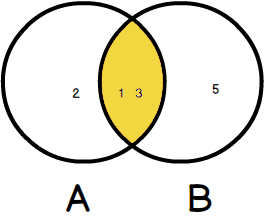

### Left Join

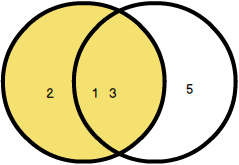

### FULL OUTER JOIN

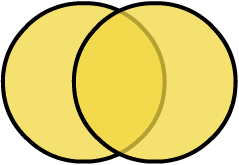

### CROSS JOIN - декартово произведение. Без использования оператора ON

### `LEFT JOIN` - склеивает таблицы слева

In [35]:
query = """
    SELECT *    
    FROM main_table
    LEFT JOIN sort_decod
        ON main_table.class_name = sort_decod.ID
"""

cursor.execute(query)
cursor.fetchall()

((1, 5.1, 3.5, 1.4, 0.2, '0', 0, 'Iris-setosa'),
 (2, 4.9, 3.0, 1.4, 0.2, '0', 0, 'Iris-setosa'),
 (3, 4.7, 3.2, 1.3, 0.2, '0', 0, 'Iris-setosa'),
 (4, 4.6, 3.1, 1.5, 0.2, '0', 0, 'Iris-setosa'),
 (5, 5.0, 3.6, 1.4, 0.2, '0', 0, 'Iris-setosa'),
 (6, 5.4, 3.9, 1.7, 0.4, '0', 0, 'Iris-setosa'),
 (7, 4.6, 3.4, 1.4, 0.3, '0', 0, 'Iris-setosa'),
 (8, 5.0, 3.4, 1.5, 0.2, '0', 0, 'Iris-setosa'),
 (9, 4.4, 2.9, 1.4, 0.2, '0', 0, 'Iris-setosa'),
 (10, 4.9, 3.1, 1.5, 0.1, '0', 0, 'Iris-setosa'),
 (11, 5.4, 3.7, 1.5, 0.2, '0', 0, 'Iris-setosa'),
 (12, 4.8, 3.4, 1.6, 0.2, '0', 0, 'Iris-setosa'),
 (13, 4.8, 3.0, 1.4, 0.1, '0', 0, 'Iris-setosa'),
 (14, 4.3, 3.0, 1.1, 0.1, '0', 0, 'Iris-setosa'),
 (15, 5.8, 4.0, 1.2, 0.2, '0', 0, 'Iris-setosa'),
 (16, 5.7, 4.4, 1.5, 0.4, '0', 0, 'Iris-setosa'),
 (17, 5.4, 3.9, 1.3, 0.4, '0', 0, 'Iris-setosa'),
 (18, 5.1, 3.5, 1.4, 0.3, '0', 0, 'Iris-setosa'),
 (19, 5.7, 3.8, 1.7, 0.3, '0', 0, 'Iris-setosa'),
 (20, 5.1, 3.8, 1.5, 0.3, '0', 0, 'Iris-setosa'),
 (21, 5.4

### Алиасы можно применять и к названиям таблиц

In [37]:
query = """
    SELECT *    
    FROM main_table AS t1
    LEFT JOIN sort_decod AS t2
        ON t1.class_name = t2.ID
"""

cursor.execute(query)
cursor.fetchall()

((1, 5.1, 3.5, 1.4, 0.2, '0', 0, 'Iris-setosa'),
 (2, 4.9, 3.0, 1.4, 0.2, '0', 0, 'Iris-setosa'),
 (3, 4.7, 3.2, 1.3, 0.2, '0', 0, 'Iris-setosa'),
 (4, 4.6, 3.1, 1.5, 0.2, '0', 0, 'Iris-setosa'),
 (5, 5.0, 3.6, 1.4, 0.2, '0', 0, 'Iris-setosa'),
 (6, 5.4, 3.9, 1.7, 0.4, '0', 0, 'Iris-setosa'),
 (7, 4.6, 3.4, 1.4, 0.3, '0', 0, 'Iris-setosa'),
 (8, 5.0, 3.4, 1.5, 0.2, '0', 0, 'Iris-setosa'),
 (9, 4.4, 2.9, 1.4, 0.2, '0', 0, 'Iris-setosa'),
 (10, 4.9, 3.1, 1.5, 0.1, '0', 0, 'Iris-setosa'),
 (11, 5.4, 3.7, 1.5, 0.2, '0', 0, 'Iris-setosa'),
 (12, 4.8, 3.4, 1.6, 0.2, '0', 0, 'Iris-setosa'),
 (13, 4.8, 3.0, 1.4, 0.1, '0', 0, 'Iris-setosa'),
 (14, 4.3, 3.0, 1.1, 0.1, '0', 0, 'Iris-setosa'),
 (15, 5.8, 4.0, 1.2, 0.2, '0', 0, 'Iris-setosa'),
 (16, 5.7, 4.4, 1.5, 0.4, '0', 0, 'Iris-setosa'),
 (17, 5.4, 3.9, 1.3, 0.4, '0', 0, 'Iris-setosa'),
 (18, 5.1, 3.5, 1.4, 0.3, '0', 0, 'Iris-setosa'),
 (19, 5.7, 3.8, 1.7, 0.3, '0', 0, 'Iris-setosa'),
 (20, 5.1, 3.8, 1.5, 0.3, '0', 0, 'Iris-setosa'),
 (21, 5.4

### Выведу только те столбцы, которые мне нужны

In [86]:
query = """
    SELECT 
        t1.ID
        ,t1.sepal_length_in_cm
        ,t1.sepal_width_in_cm
        ,t1.petal_length_in_cm
        ,t1.petal_width_in_cm
        ,t2.name
    FROM main_table as t1
    LEFT JOIN sort_decod as t2
        ON t1.class_name = t2.ID
"""

cursor.execute(query)
cursor.fetchall()

((1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
 (2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'),
 (3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
 (4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
 (5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'),
 (6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
 (7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
 (8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'),
 (9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
 (10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
 (11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
 (12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
 (13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'),
 (14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'),
 (15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'),
 (16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
 (17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
 (18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
 (19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
 (20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'),
 (21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'),
 (22, 5.1, 3.7, 1.5, 0.4, 'Iris-setosa'),
 (23, 4.6, 3.6, 1.0, 0.2, 'Iris-setosa'),
 (24, 5.1, 3.3, 1.7, 0.5, 'Iris-setosa'),
 

### Полный набор операторов для выражения `SELECT`

## `ALTER TABLE` - оператор изменения таблицы

### `ADD` - добавляет столбец

In [87]:
query = """
        ALTER TABLE main_table
        ADD NEW_COL INT
"""

cursor.execute(query)
cursor.fetchall()

()

In [88]:
cursor.execute(query_select_all)
cursor.fetchall()

((1, 5.1, 3.5, 1.4, 0.2, '0', None),
 (2, 4.9, 3.0, 1.4, 0.2, '0', None),
 (3, 4.7, 3.2, 1.3, 0.2, '0', None),
 (4, 4.6, 3.1, 1.5, 0.2, '0', None),
 (5, 5.0, 3.6, 1.4, 0.2, '0', None),
 (6, 5.4, 3.9, 1.7, 0.4, '0', None),
 (7, 4.6, 3.4, 1.4, 0.3, '0', None),
 (8, 5.0, 3.4, 1.5, 0.2, '0', None),
 (9, 4.4, 2.9, 1.4, 0.2, '0', None),
 (10, 4.9, 3.1, 1.5, 0.1, '0', None),
 (11, 5.4, 3.7, 1.5, 0.2, '0', None),
 (12, 4.8, 3.4, 1.6, 0.2, '0', None),
 (13, 4.8, 3.0, 1.4, 0.1, '0', None),
 (14, 4.3, 3.0, 1.1, 0.1, '0', None),
 (15, 5.8, 4.0, 1.2, 0.2, '0', None),
 (16, 5.7, 4.4, 1.5, 0.4, '0', None),
 (17, 5.4, 3.9, 1.3, 0.4, '0', None),
 (18, 5.1, 3.5, 1.4, 0.3, '0', None),
 (19, 5.7, 3.8, 1.7, 0.3, '0', None),
 (20, 5.1, 3.8, 1.5, 0.3, '0', None),
 (21, 5.4, 3.4, 1.7, 0.2, '0', None),
 (22, 5.1, 3.7, 1.5, 0.4, '0', None),
 (23, 4.6, 3.6, 1.0, 0.2, '0', None),
 (24, 5.1, 3.3, 1.7, 0.5, '0', None),
 (25, 4.8, 3.4, 1.9, 0.2, '0', None),
 (26, 5.0, 3.0, 1.6, 0.2, '0', None),
 (27, 5.0, 3.4, 1.6, 

### `NULL` - тип, который не содержит данных

In [41]:
query = """
        SELECT *
        FROM main_table
        WHERE NEW_COL IS NULL
"""

cursor.execute(query)
cursor.fetchall()

((1, 5.1, 3.5, 1.4, 0.2, '0', None),
 (2, 4.9, 3.0, 1.4, 0.2, '0', None),
 (3, 4.7, 3.2, 1.3, 0.2, '0', None),
 (4, 4.6, 3.1, 1.5, 0.2, '0', None),
 (5, 5.0, 3.6, 1.4, 0.2, '0', None),
 (6, 5.4, 3.9, 1.7, 0.4, '0', None),
 (7, 4.6, 3.4, 1.4, 0.3, '0', None),
 (8, 5.0, 3.4, 1.5, 0.2, '0', None),
 (9, 4.4, 2.9, 1.4, 0.2, '0', None),
 (10, 4.9, 3.1, 1.5, 0.1, '0', None),
 (11, 5.4, 3.7, 1.5, 0.2, '0', None),
 (12, 4.8, 3.4, 1.6, 0.2, '0', None),
 (13, 4.8, 3.0, 1.4, 0.1, '0', None),
 (14, 4.3, 3.0, 1.1, 0.1, '0', None),
 (15, 5.8, 4.0, 1.2, 0.2, '0', None),
 (16, 5.7, 4.4, 1.5, 0.4, '0', None),
 (17, 5.4, 3.9, 1.3, 0.4, '0', None),
 (18, 5.1, 3.5, 1.4, 0.3, '0', None),
 (19, 5.7, 3.8, 1.7, 0.3, '0', None),
 (20, 5.1, 3.8, 1.5, 0.3, '0', None),
 (21, 5.4, 3.4, 1.7, 0.2, '0', None),
 (22, 5.1, 3.7, 1.5, 0.4, '0', None),
 (23, 4.6, 3.6, 1.0, 0.2, '0', None),
 (24, 5.1, 3.3, 1.7, 0.5, '0', None),
 (25, 4.8, 3.4, 1.9, 0.2, '0', None),
 (26, 5.0, 3.0, 1.6, 0.2, '0', None),
 (27, 5.0, 3.4, 1.6, 

### Так нельзя

In [89]:
query = """
        SELECT *
        FROM main_table
        WHERE NEW_COL = NULL
"""

cursor.execute(query)
cursor.fetchall()

()

In [90]:
query = """
        SELECT *
        FROM main_table
        WHERE NEW_COL IS NOT NULL
"""

cursor.execute(query)
cursor.fetchall()

()

### `DROP` - удаляет столбец

SQLITE, в отличии от других СУБД, не поддерживает удаление столбцов

In [91]:
query = """
            ALTER TABLE main_table
            DROP COLUMN NEW_COL
        """

cursor.execute(query)
cursor.fetchall()

()

In [92]:
cursor.execute(query_select_all)
cursor.fetchall()

((1, 5.1, 3.5, 1.4, 0.2, '0'),
 (2, 4.9, 3.0, 1.4, 0.2, '0'),
 (3, 4.7, 3.2, 1.3, 0.2, '0'),
 (4, 4.6, 3.1, 1.5, 0.2, '0'),
 (5, 5.0, 3.6, 1.4, 0.2, '0'),
 (6, 5.4, 3.9, 1.7, 0.4, '0'),
 (7, 4.6, 3.4, 1.4, 0.3, '0'),
 (8, 5.0, 3.4, 1.5, 0.2, '0'),
 (9, 4.4, 2.9, 1.4, 0.2, '0'),
 (10, 4.9, 3.1, 1.5, 0.1, '0'),
 (11, 5.4, 3.7, 1.5, 0.2, '0'),
 (12, 4.8, 3.4, 1.6, 0.2, '0'),
 (13, 4.8, 3.0, 1.4, 0.1, '0'),
 (14, 4.3, 3.0, 1.1, 0.1, '0'),
 (15, 5.8, 4.0, 1.2, 0.2, '0'),
 (16, 5.7, 4.4, 1.5, 0.4, '0'),
 (17, 5.4, 3.9, 1.3, 0.4, '0'),
 (18, 5.1, 3.5, 1.4, 0.3, '0'),
 (19, 5.7, 3.8, 1.7, 0.3, '0'),
 (20, 5.1, 3.8, 1.5, 0.3, '0'),
 (21, 5.4, 3.4, 1.7, 0.2, '0'),
 (22, 5.1, 3.7, 1.5, 0.4, '0'),
 (23, 4.6, 3.6, 1.0, 0.2, '0'),
 (24, 5.1, 3.3, 1.7, 0.5, '0'),
 (25, 4.8, 3.4, 1.9, 0.2, '0'),
 (26, 5.0, 3.0, 1.6, 0.2, '0'),
 (27, 5.0, 3.4, 1.6, 0.4, '0'),
 (28, 5.2, 3.5, 1.5, 0.2, '0'),
 (29, 5.2, 3.4, 1.4, 0.2, '0'),
 (30, 4.7, 3.2, 1.6, 0.2, '0'),
 (31, 4.8, 3.1, 1.6, 0.2, '0'),
 (32, 5.4, 3.4, 1

### `ALTER COLUMN` - изменяет столбец

In [47]:
query = """
            ALTER TABLE main_table
            MODIFY class_name INT
        """

cursor.execute(query)
cursor.fetchall()

()

In [48]:
cursor.execute(query_select_all)
cursor.fetchall()

((1, 5.1, 3.5, 1.4, 0.2, 0),
 (2, 4.9, 3.0, 1.4, 0.2, 0),
 (3, 4.7, 3.2, 1.3, 0.2, 0),
 (4, 4.6, 3.1, 1.5, 0.2, 0),
 (5, 5.0, 3.6, 1.4, 0.2, 0),
 (6, 5.4, 3.9, 1.7, 0.4, 0),
 (7, 4.6, 3.4, 1.4, 0.3, 0),
 (8, 5.0, 3.4, 1.5, 0.2, 0),
 (9, 4.4, 2.9, 1.4, 0.2, 0),
 (10, 4.9, 3.1, 1.5, 0.1, 0),
 (11, 5.4, 3.7, 1.5, 0.2, 0),
 (12, 4.8, 3.4, 1.6, 0.2, 0),
 (13, 4.8, 3.0, 1.4, 0.1, 0),
 (14, 4.3, 3.0, 1.1, 0.1, 0),
 (15, 5.8, 4.0, 1.2, 0.2, 0),
 (16, 5.7, 4.4, 1.5, 0.4, 0),
 (17, 5.4, 3.9, 1.3, 0.4, 0),
 (18, 5.1, 3.5, 1.4, 0.3, 0),
 (19, 5.7, 3.8, 1.7, 0.3, 0),
 (20, 5.1, 3.8, 1.5, 0.3, 0),
 (21, 5.4, 3.4, 1.7, 0.2, 0),
 (22, 5.1, 3.7, 1.5, 0.4, 0),
 (23, 4.6, 3.6, 1.0, 0.2, 0),
 (24, 5.1, 3.3, 1.7, 0.5, 0),
 (25, 4.8, 3.4, 1.9, 0.2, 0),
 (26, 5.0, 3.0, 1.6, 0.2, 0),
 (27, 5.0, 3.4, 1.6, 0.4, 0),
 (28, 5.2, 3.5, 1.5, 0.2, 0),
 (29, 5.2, 3.4, 1.4, 0.2, 0),
 (30, 4.7, 3.2, 1.6, 0.2, 0),
 (31, 4.8, 3.1, 1.6, 0.2, 0),
 (32, 5.4, 3.4, 1.5, 0.4, 0),
 (33, 5.2, 4.1, 1.5, 0.1, 0),
 (34, 5.5, 4.2, 1.4

### `DROP TABLE` - удаляет таблицу

In [93]:
query = """
            DROP TABLE main_table;
        """

cursor.execute(query)
cursor.fetchall()

()

### Нельзя удалить несуществующую таблицу

In [94]:
query = """
            DROP TABLE main_table
        """

cursor.execute(query)
cursor.fetchall()

InternalError: (1051, "Unknown table 'nordicDB.main_table'")

### Для избежания ошибки применяется следующее выражение

In [51]:
query = """
            DROP TABLE IF EXISTS main_table
        """

cursor.execute(query)
cursor.fetchall()

C:\ProgramData\Anaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (1051, "Unknown table 'nordicDB.main_table'")
  result = self._query(query)


()

### `TRUNCATE TABLE` - так же удаляет таблицу вместе с данными

In [95]:
query = """
            TRUNCATE TABLE sort_decod
        """

cursor.execute(query)
cursor.fetchall()

()

In [96]:
cursor.execute("SELECT * FROM sort_decode")
cursor.fetchall()

ProgrammingError: (1146, "Table 'nordicDB.sort_decode' doesn't exist")

### `CREATE DATABASE` - создает БД

In [97]:
query = """
            CREATE DATABASE new_mysql
        """

cursor.execute(query)
cursor.fetchall()

OperationalError: (1044, "Access denied for user 'nordic'@'%' to database 'new_mysql'")

### `DROP DATABASE` - удаляет БД

In [ ]:
query = """
            DROP DATABASE new_mysql
        """

cursor.execute(query)
cursor.fetchall()

In [98]:
cursor.close()
db_conn.close()